In [245]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
path=os.path.dirname(os.path.abspath("__file__"))
print(path)

C:\Users\40104157\MS Assignments\Linear Regression Assignment\Bike Sharing Assignment


In [2]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [4]:
def missingValuesCheck(x):
    l = []
    for i in x.columns:
        l.append(x[i].isnull().sum())

    missing = pd.DataFrame()
    missing['columns'] = x.columns
    missing['missing'] = l
    missing['pct_missing'] = round((missing.missing / x.shape[0])*100,2)
    missing = missing[missing.missing!=0]

    return missing

In [3]:
#Load the dataset
df = pd.read_csv(path+'/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
missingValuesCheck(df)

# No Missing values in the data 

,columns,missing,pct_missing


In [7]:
df['check'] = df.casual + df.registered
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1600


In [15]:
df['check_flag'] = np.where(df.cnt==df.check, 1, 0)
print('Check Flag column has only one value: ', df.check_flag.nunique(), '--> Meaning, cnt is indeed a sum of casual and registered. Hence, we can drop the two columns')
df.head()

Check Flag column has only one value:  1 --> Meaning, cnt is indeed a sum of casual and registered. Hence, we can drop the two columns


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,check,check_flag
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1349,1
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1562,1
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1600,1


In [108]:
# Dropping all the columns that are not necessary 

df2 = df.drop(['casual', 'registered', 'check', 'check_flag'], axis=1)
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [109]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


In [110]:
df2.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [111]:
# Treating season and yr column in order to make it a lot more readable and logical. Using the data dictionary,

df2['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
#df2['yr'].replace({0:2018, 1:2019}, inplace=True)
df2['mnth'].replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec',}, inplace=True)
df2['weathersit'].replace({1:'clear', 2:'mist_cloudy', 3:'light_snow', 4:'heavy_rain'}, inplace=True)
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,spring,0,jan,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [112]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [113]:
df2.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [114]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [115]:
df2.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [116]:
# Mapping has been done successfully

In [117]:
# Dropping date column as it cannot be used as a feature in the model

df2.drop('dteday', axis=1, inplace=True)
df2.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,jan,0,6,0,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,jan,0,0,0,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:>

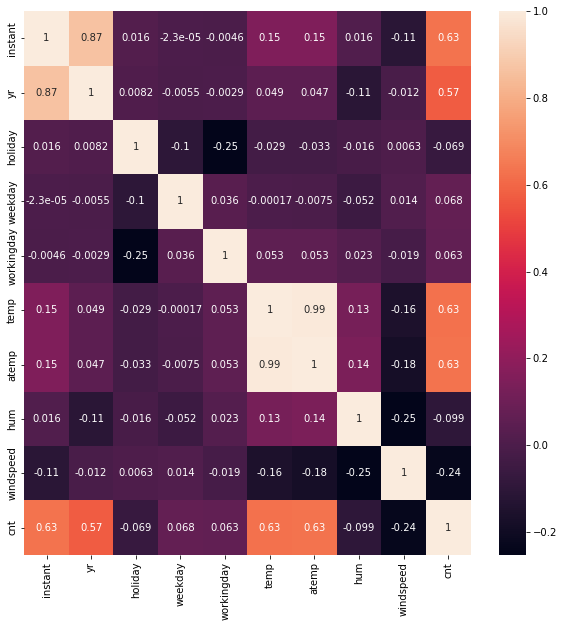

In [118]:
# Checking the correlation of the variables

plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(), annot = True)

In [119]:
# From the above heatmap, it is evident that temp and atemp are almost the same. Hence, dropping 'atemp' 

df2.drop('atemp', axis=1, inplace=True)

''' There are few more features that are fairly correlated to each other, 
    but, we can use either VIF or p-values to more confidently say about its multicollinearity
'''

df2.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,spring,0,jan,0,6,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,2,spring,0,jan,0,0,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,3,spring,0,jan,0,1,1,clear,8.050924,43.7273,16.636703,1349
3,4,spring,0,jan,0,2,1,clear,8.200000,59.0435,10.739832,1562
4,5,spring,0,jan,0,3,1,clear,9.305237,43.6957,12.522300,1600


In [120]:
df2.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,spring,0,jan,0,6,0,mist_cloudy,14.110847,80.5833,10.749882,985
1,2,spring,0,jan,0,0,0,mist_cloudy,14.902598,69.6087,16.652113,801
2,3,spring,0,jan,0,1,1,clear,8.050924,43.7273,16.636703,1349
3,4,spring,0,jan,0,2,1,clear,8.200000,59.0435,10.739832,1562
4,5,spring,0,jan,0,3,1,clear,9.305237,43.6957,12.522300,1600


In [121]:
# We will now use one hot encoding for the categorical variables
cat_vars = ['season', 'mnth', 'weathersit']

dummy_vars_df = pd.get_dummies(df2[cat_vars], drop_first=True)


dummy_vars_df.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_light_snow,weathersit_mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [122]:
# Dropping the two encoded columns and adding the dummies for the same

df2.drop(cat_vars, axis=1, inplace=True)

df3 = pd.concat([df2, dummy_vars_df], axis=1)

df3.head()

,instant,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_light_snow,weathersit_mist_cloudy
0,1,0,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,3,0,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,4,0,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,0,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [123]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 730 non-null    int64  
 1   yr                      730 non-null    int64  
 2   holiday                 730 non-null    int64  
 3   weekday                 730 non-null    int64  
 4   workingday              730 non-null    int64  
 5   temp                    730 non-null    float64
 6   hum                     730 non-null    float64
 7   windspeed               730 non-null    float64
 8   cnt                     730 non-null    int64  
 9   season_spring           730 non-null    uint8  
 10  season_summer           730 non-null    uint8  
 11  season_winter           730 non-null    uint8  
 12  mnth_aug                730 non-null    uint8  
 13  mnth_dec                730 non-null    uint8  
 14  mnth_feb                730 non-null    ui

In [194]:
# Splitting the data into train and test

df_train, df_test = train_test_split(df3, test_size=0.3, random_state=1)
print(df_train.shape)
print(df_test.shape)

(511, 25)
(219, 25)


In [195]:
# Rescalling 'temp', 'hum' and 'windspeed' columns

scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\40104157\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,instant,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_light_snow,weathersit_mist_cloudy
589,590,1,0,1,1,0.837559,0.405453,0.271536,6883,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
135,136,0,0,1,1,0.656134,0.743040,0.249252,3958,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
626,627,1,0,3,1,0.624490,0.393272,0.459915,7591,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
554,555,1,0,1,1,0.824902,0.597447,0.378326,6569,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
311,312,0,0,2,1,0.442008,0.650812,0.111281,4205,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [196]:
cols = list(df3.columns)
cols.remove('instant')
cols.remove('cnt')

In [197]:
cols

['yr',
 'holiday',
 'weekday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_aug',
 'mnth_dec',
 'mnth_feb',
 'mnth_jan',
 'mnth_july',
 'mnth_june',
 'mnth_mar',
 'mnth_may',
 'mnth_nov',
 'mnth_oct',
 'mnth_sept',
 'weathersit_light_snow',
 'weathersit_mist_cloudy']

In [198]:
# Model Building

ytrain = df_train.pop('cnt')
xtrain = df_train

In [199]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     108.5
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          4.45e-175
Time:                        14:03:44   Log-Likelihood:                -4120.3
No. Observations:                 511   AIC:                             8289.
Df Residuals:                     487   BIC:                             8390.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2499.5562    385.947      6.476      0.000    1741.230    3257.882
yr                      2034.4221     71.818     28.327      0.000    1893.311    2175.533
holiday                 -515.9702    211.967     -2.434      0.015    -932.453     -99.488
weekday                   74.0402     17.669      4.190      0.000      39.323     108.758
workingday                21.9078     79.537      0.275      0.783    -134.370     178.186
temp                    3792.0542    411.226      9.221      0.000    2984.059    4600.050
hum                    -1281.3477    274.017     -4.676      0.000   -1819.750    -742.945
windspeed              -1381.0363    206.256     -6.696      0.000   -1786.297    -975.775
season_spring           -658.6981    271.607     -2.425      0.016   -1192.365    -125.031
season_summer            243.0757    231.710      1.049      0.295    -212.199     698.351
season_winter            573.3392    233.642      2.454      0.014     114.269    1032.410
mnth_aug                  35.8912    297.267      0.121      0.904    -548.193     619.975
mnth_dec                -268.0710    309.356     -0.867      0.387    -875.908     339.766
mnth_feb                -170.3513    306.610     -0.556      0.579    -772.793     432.091
mnth_jan                -369.9243    313.980     -1.178      0.239    -986.846     246.998
mnth_july               -259.4897    302.416     -0.858      0.391    -853.691     334.711
mnth_june                -24.6025    209.693     -0.117      0.907    -436.616     387.411
mnth_mar                 339.5371    226.081      1.502      0.134    -104.677     783.751
mnth_may                 259.1640    179.476      1.444      0.149     -93.478     611.806
mnth_nov                -224.9079    327.762     -0.686      0.493    -868.910     419.094
mnth_oct                 370.1798    322.754      1.147      0.252    -263.983    1004.342
mnth_sept                724.3634    280.032      2.587      0.010     174.144    1274.583
weathersit_light_snow  -1879.0633    243.051     -7.731      0.000   -2356.620   -1401.506
weathersit_mist_cloudy  -310.0033     97.652     -3.175      0.002    -501.875    -118.132
==============================================================================
Omnibus:                       97.201   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.156
Skew:                          -0.956   Prob(JB):                     5.82e-54
Kurtosis:                       5.804   Cond. No.                         84.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.128782
1,holiday,1.160276
2,weekday,3.063582
3,workingday,3.558024
4,temp,36.457499
5,hum,18.605701
6,windspeed,6.078085
7,season_spring,11.115927
8,season_summer,6.288885
9,season_winter,10.728150


In [201]:
# Removing 'mnth_nov' as it is insignificant in both pvalue and VIF analysis

cols.remove('mnth_nov')

In [202]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          5.21e-176
Time:                        14:05:16   Log-Likelihood:                -4120.6
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     488   BIC:                             8385.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2355.5399    323.717      7.277      0.000    1719.489    2991.591
yr                      2033.8815     71.775     28.337      0.000    1892.856    2174.907
holiday                 -534.3791    210.148     -2.543      0.011    -947.286    -121.472
weekday                   73.8807     17.658      4.184      0.000      39.185     108.576
workingday                16.5135     79.105      0.209      0.835    -138.914     171.941
temp                    3863.0137    397.795      9.711      0.000    3081.411    4644.617
hum                    -1290.9696    273.510     -4.720      0.000   -1828.372    -753.567
windspeed              -1372.7435    205.790     -6.671      0.000   -1777.087    -968.400
season_spring           -652.7814    271.323     -2.406      0.017   -1185.888    -119.675
season_summer            323.4239    199.839      1.618      0.106     -69.227     716.075
season_winter            497.1059    205.427      2.420      0.016      93.475     900.737
mnth_aug                 126.5882    266.122      0.476      0.635    -396.298     649.474
mnth_dec                 -93.0798    175.025     -0.532      0.595    -436.976     250.816
mnth_feb                 -50.0703    251.427     -0.199      0.842    -544.084     443.943
mnth_jan                -244.0574    254.690     -0.958      0.338    -744.482     256.367
mnth_july               -171.6814    273.860     -0.627      0.531    -709.771     366.408
mnth_june                 12.3640    202.545      0.061      0.951    -385.603     410.331
mnth_mar                 417.8760    195.032      2.143      0.033      34.669     801.083
mnth_may                 280.4302    176.684      1.587      0.113     -66.725     627.585
mnth_oct                 559.0028    168.577      3.316      0.001     227.776     890.230
mnth_sept                846.2588    216.358      3.911      0.000     421.150    1271.367
weathersit_light_snow  -1882.5926    242.864     -7.752      0.000   -2359.781   -1405.404
weathersit_mist_cloudy  -305.4618     97.375     -3.137      0.002    -496.787    -114.136
==============================================================================
Omnibus:                       96.900   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.977
Skew:                          -0.955   Prob(JB):                     1.73e-53
Kurtosis:                       5.786   Cond. No.                         59.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.116918
1,holiday,1.135949
2,weekday,3.022460
3,workingday,3.484420
4,temp,36.314495
5,hum,17.839740
6,windspeed,5.920564
7,season_spring,10.431228
8,season_summer,5.983742
9,season_winter,5.046713


In [204]:
# Dropping 'mnth_june' column as it is insignificant in terms of pvalue

cols.remove('mnth_june')

In [205]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          4.72e-177
Time:                        14:06:19   Log-Likelihood:                -4120.6
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     489   BIC:                             8378.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2356.1210    323.247      7.289      0.000    1720.996    2991.246
yr                      2033.3662     71.204     28.557      0.000    1893.463    2173.270
holiday                 -535.6525    208.897     -2.564      0.011    -946.100    -125.205
weekday                   73.8749     17.640      4.188      0.000      39.215     108.534
workingday                16.3065     78.951      0.207      0.836    -138.819     171.432
temp                    3876.6787    328.495     11.801      0.000    3231.243    4522.114
hum                    -1293.7105    269.525     -4.800      0.000   -1823.280    -764.141
windspeed              -1374.3746    203.840     -6.742      0.000   -1774.884    -973.865
season_spring           -654.7128    269.198     -2.432      0.015   -1183.639    -125.786
season_summer            321.7239    197.687      1.627      0.104     -66.697     710.145
season_winter            494.1468    199.423      2.478      0.014     102.316     885.978
mnth_aug                 117.0706    215.444      0.543      0.587    -306.240     540.381
mnth_dec                 -93.4253    174.755     -0.535      0.593    -436.789     249.939
mnth_feb                 -50.6738    250.977     -0.202      0.840    -543.799     442.452
mnth_jan                -243.7066    254.366     -0.958      0.338    -743.492     256.078
mnth_july               -182.0093    215.127     -0.846      0.398    -604.696     240.678
mnth_mar                 415.2257    189.945      2.186      0.029      42.018     788.434
mnth_may                 274.6780    149.305      1.840      0.066     -18.681     568.037
mnth_oct                 556.4631    163.196      3.410      0.001     235.811     877.115
mnth_sept                839.3599    184.307      4.554      0.000     477.228    1201.491
weathersit_light_snow  -1881.7881    242.259     -7.768      0.000   -2357.786   -1405.790
weathersit_mist_cloudy  -304.8461     96.752     -3.151      0.002    -494.948    -114.744
==============================================================================
Omnibus:                       96.629   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.779
Skew:                          -0.953   Prob(JB):                     3.15e-53
Kurtosis:                       5.779   Cond. No.                         54.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.088941
1,holiday,1.125161
2,weekday,3.022460
3,workingday,3.478891
4,temp,20.135604
5,hum,17.368027
6,windspeed,5.823426
7,season_spring,10.290002
8,season_summer,5.852037
9,season_winter,4.635837


In [207]:
# Dropping 'mnth_feb' column as it is insignificant in terms of pvalue

cols.remove('mnth_feb')

In [208]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          4.25e-178
Time:                        14:06:52   Log-Likelihood:                -4120.6
No. Observations:                 511   AIC:                             8283.
Df Residuals:                     490   BIC:                             8372.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2344.1753    317.475      7.384      0.000    1720.395    2967.956
yr                      2032.5041     71.006     28.624      0.000    1892.990    2172.018
holiday                 -535.1930    208.680     -2.565      0.011    -945.212    -125.174
weekday                   73.9118     17.622      4.194      0.000      39.288     108.535
workingday                14.6652     78.455      0.187      0.852    -139.484     168.815
temp                    3893.5597    317.366     12.268      0.000    3269.994    4517.125
hum                    -1294.6516    269.220     -4.809      0.000   -1823.620    -765.683
windspeed              -1373.7577    203.617     -6.747      0.000   -1773.828    -973.687
season_spring           -683.6667    227.600     -3.004      0.003   -1130.858    -236.475
season_summer            321.3185    197.483      1.627      0.104     -66.700     709.337
season_winter            495.6746    199.084      2.490      0.013     104.511     886.838
mnth_aug                 116.7499    215.228      0.542      0.588    -306.133     539.633
mnth_dec                 -77.3686    155.460     -0.498      0.619    -382.819     228.082
mnth_jan                -205.3465    168.967     -1.215      0.225    -537.336     126.643
mnth_july               -183.3151    214.819     -0.853      0.394    -605.395     238.765
mnth_mar                 438.0824    152.375      2.875      0.004     138.693     737.471
mnth_may                 277.2928    148.597      1.866      0.063     -14.673     569.258
mnth_oct                 559.3634    162.403      3.444      0.001     240.271     878.456
mnth_sept                840.6065    184.023      4.568      0.000     479.035    1202.179
weathersit_light_snow  -1880.6322    241.955     -7.773      0.000   -2356.029   -1405.236
weathersit_mist_cloudy  -304.5519     96.647     -3.151      0.002    -494.445    -114.659
==============================================================================
Omnibus:                       96.100   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.658
Skew:                          -0.950   Prob(JB):                     9.10e-53
Kurtosis:                       5.766   Cond. No.                         54.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.074419
1,holiday,1.125158
2,weekday,3.020521
3,workingday,3.423472
4,temp,19.464769
5,hum,17.273550
6,windspeed,5.804197
7,season_spring,5.097355
8,season_summer,5.739422
9,season_winter,4.576904


In [210]:
# Dropping 'workingday' column as it is insignificant in terms of pvalue

cols.remove('workingday')

In [211]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     132.2
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          3.71e-179
Time:                        14:07:34   Log-Likelihood:                -4120.6
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     491   BIC:                             8366.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2352.0665    314.346      7.482      0.000    1734.436    2969.697
yr                      2032.8422     70.913     28.667      0.000    1893.511    2172.173
holiday                 -545.1155    201.618     -2.704      0.007    -941.255    -148.976
weekday                   74.1863     17.543      4.229      0.000      39.717     108.655
temp                    3898.6135    315.901     12.341      0.000    3277.929    4519.298
hum                    -1295.6294    268.905     -4.818      0.000   -1823.976    -767.283
windspeed              -1374.1006    203.409     -6.755      0.000   -1773.759    -974.442
season_spring           -683.8275    227.374     -3.007      0.003   -1130.574    -237.081
season_summer            319.9181    197.147      1.623      0.105     -67.438     707.274
season_winter            494.9552    198.851      2.489      0.013     104.251     885.659
mnth_aug                 114.2353    214.595      0.532      0.595    -307.403     535.874
mnth_dec                 -77.4970    155.306     -0.499      0.618    -382.643     227.648
mnth_jan                -204.8682    168.782     -1.214      0.225    -536.492     126.755
mnth_july               -186.3513    213.993     -0.871      0.384    -606.807     234.105
mnth_mar                 438.3521    152.218      2.880      0.004     139.272     737.432
mnth_may                 278.0725    148.392      1.874      0.062     -13.489     569.634
mnth_oct                 559.2894    162.243      3.447      0.001     240.513     878.066
mnth_sept                838.4559    183.483      4.570      0.000     477.948    1198.964
weathersit_light_snow  -1878.7806    241.514     -7.779      0.000   -2353.309   -1404.252
weathersit_mist_cloudy  -303.4168     96.361     -3.149      0.002    -492.747    -114.086
==============================================================================
Omnibus:                       96.715   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.649
Skew:                          -0.956   Prob(JB):                     5.54e-53
Kurtosis:                       5.765   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.070478
1,holiday,1.055907
2,weekday,2.982730
3,temp,18.593128
4,hum,17.266174
5,windspeed,5.792941
6,season_spring,5.026064
7,season_summer,5.726713
8,season_winter,4.536707
9,mnth_aug,2.900461


In [213]:
# Dropping 'mnth_dec' column as it is insignificant in terms of pvalue

cols.remove('mnth_dec')

In [214]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     139.8
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          3.50e-180
Time:                        14:08:06   Log-Likelihood:                -4120.7
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     492   BIC:                             8360.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2328.1972    310.448      7.499      0.000    1718.229    2938.165
yr                      2031.4678     70.806     28.691      0.000    1892.349    2170.587
holiday                 -542.8159    201.411     -2.695      0.007    -938.548    -147.084
weekday                   74.3966     17.525      4.245      0.000      39.964     108.829
temp                    3922.0467    312.152     12.565      0.000    3308.730    4535.363
hum                    -1307.6025    267.628     -4.886      0.000   -1833.437    -781.768
windspeed              -1365.5220    202.526     -6.742      0.000   -1763.445    -967.599
season_spring           -683.3417    227.198     -3.008      0.003   -1129.741    -236.943
season_summer            329.9723    195.965      1.684      0.093     -55.059     715.004
season_winter            488.1731    198.235      2.463      0.014      98.682     877.664
mnth_aug                 121.8433    213.890      0.570      0.569    -298.407     542.093
mnth_jan                -185.1975    163.988     -1.129      0.259    -507.402     137.007
mnth_july               -180.1090    213.464     -0.844      0.399    -599.523     239.305
mnth_mar                 448.3619    150.776      2.974      0.003     152.118     744.605
mnth_may                 279.5321    148.250      1.886      0.060     -11.749     570.813
mnth_oct                 581.2938    156.016      3.726      0.000     274.754     887.834
mnth_sept                852.2825    181.240      4.703      0.000     496.183    1208.382
weathersit_light_snow  -1876.7505    241.295     -7.778      0.000   -2350.847   -1402.654
weathersit_mist_cloudy  -303.0065     96.284     -3.147      0.002    -492.185    -113.828
==============================================================================
Omnibus:                       95.689   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.721
Skew:                          -0.950   Prob(JB):                     6.51e-52
Kurtosis:                       5.731   Cond. No.                         52.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.062858
1,holiday,1.055578
2,weekday,2.982565
3,temp,18.504797
4,hum,16.919490
5,windspeed,5.787715
6,season_spring,4.930478
7,season_summer,5.724756
8,season_winter,4.292521
9,mnth_aug,2.898690


In [216]:
# Dropping 'mnth_aug' column as it is insignificant in terms of VIF

cols.remove('mnth_aug')

In [217]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     148.2
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          3.32e-181
Time:                        14:08:37   Log-Likelihood:                -4120.9
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     493   BIC:                             8354.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2382.6837    295.144      8.073      0.000    1802.788    2962.579
yr                      2029.9113     70.705     28.710      0.000    1890.992    2168.831
holiday                 -547.9410    201.072     -2.725      0.007    -943.005    -152.877
weekday                   74.4032     17.513      4.249      0.000      39.994     108.812
temp                    3953.3911    307.054     12.875      0.000    3350.095    4556.687
hum                    -1302.6346    267.302     -4.873      0.000   -1827.827    -777.442
windspeed              -1362.6042    202.323     -6.735      0.000   -1760.125    -965.083
season_spring           -751.8736    192.601     -3.904      0.000   -1130.293    -373.454
season_summer            253.8729    143.277      1.772      0.077     -27.636     535.382
season_winter            426.0504    165.429      2.575      0.010     101.018     751.083
mnth_jan                -181.6764    163.760     -1.109      0.268    -503.429     140.076
mnth_july               -264.7292    153.195     -1.728      0.085    -565.725      36.267
mnth_mar                 447.9334    150.670      2.973      0.003     151.898     743.969
mnth_may                 276.0313    148.021      1.865      0.063     -14.799     566.861
mnth_oct                 568.7463    154.348      3.685      0.000     265.486     872.007
mnth_sept                789.2555    143.451      5.502      0.000     507.404    1071.107
weathersit_light_snow  -1881.7263    240.972     -7.809      0.000   -2355.185   -1408.268
weathersit_mist_cloudy  -301.5297     96.183     -3.135      0.002    -490.509    -112.551
==============================================================================
Omnibus:                       96.356   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.619
Skew:                          -0.958   Prob(JB):                     4.16e-52
Kurtosis:                       5.729   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.062789
1,holiday,1.054181
2,weekday,2.968703
3,temp,14.020717
4,hum,16.576602
5,windspeed,5.646064
6,season_spring,3.886038
7,season_summer,3.328231
8,season_winter,3.261311
9,mnth_jan,1.778498


In [219]:
# Dropping 'mnth_july' column as it is insignificant in terms of VIF

cols.remove('mnth_july')

In [220]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.15e-181
Time:                        14:09:07   Log-Likelihood:                -4122.4
No. Observations:                 511   AIC:                             8279.
Df Residuals:                     494   BIC:                             8351.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2331.2558    294.230      7.923      0.000    1753.160    2909.352
yr                      2029.0882     70.845     28.641      0.000    1889.894    2168.283
holiday                 -558.2086    201.388     -2.772      0.006    -953.891    -162.526
weekday                   75.3810     17.539      4.298      0.000      40.921     109.841
temp                    3850.4658    301.827     12.757      0.000    3257.443    4443.489
hum                    -1276.4309    267.408     -4.773      0.000   -1801.828    -751.034
windspeed              -1341.0180    202.342     -6.627      0.000   -1738.575    -943.461
season_spring           -687.3860    189.330     -3.631      0.000   -1059.378    -315.394
season_summer            342.8689    133.969      2.559      0.011      79.649     606.089
season_winter            486.9273    161.959      3.006      0.003     168.714     805.141
mnth_jan                -193.1039    163.955     -1.178      0.239    -515.238     129.030
mnth_mar                 447.3176    150.973      2.963      0.003     150.690     743.945
mnth_may                 283.4583    148.256      1.912      0.056      -7.831     574.748
mnth_oct                 591.7044    154.084      3.840      0.000     288.964     894.445
mnth_sept                872.4812    135.396      6.444      0.000     606.457    1138.505
weathersit_light_snow  -1905.1833    241.072     -7.903      0.000   -2378.837   -1431.529
weathersit_mist_cloudy  -303.3999     96.370     -3.148      0.002    -492.745    -114.054
==============================================================================
Omnibus:                       98.087   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.246
Skew:                          -0.978   Prob(JB):                     1.84e-52
Kurtosis:                       5.714   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.061885
1,holiday,1.053120
2,weekday,2.968345
3,temp,11.928277
4,hum,16.566950
5,windspeed,5.642801
6,season_spring,3.774056
7,season_summer,2.896061
8,season_winter,3.136784
9,mnth_jan,1.772201


In [222]:
# Dropping 'mnth_jan' column as it is insignificant in terms of pvalue

cols.remove('mnth_jan')

In [223]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.8
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.74e-182
Time:                        14:10:00   Log-Likelihood:                -4123.2
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     495   BIC:                             8346.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2268.0252    289.403      7.837      0.000    1699.415    2836.636
yr                      2028.9181     70.873     28.628      0.000    1889.670    2168.166
holiday                 -562.8782    201.428     -2.794      0.005    -958.637    -167.120
weekday                   75.4355     17.545      4.299      0.000      40.963     109.908
temp                    3925.5270    295.137     13.301      0.000    3345.651    4505.403
hum                    -1282.9255    267.456     -4.797      0.000   -1808.414    -757.437
windspeed              -1326.8700    202.064     -6.567      0.000   -1723.879    -929.861
season_spring           -731.6890    185.629     -3.942      0.000   -1096.406    -366.972
season_summer            350.6014    133.861      2.619      0.009      87.596     613.607
season_winter            517.1079    159.982      3.232      0.001     202.781     831.435
mnth_mar                 495.2558    145.439      3.405      0.001     209.501     781.010
mnth_may                 287.0333    148.283      1.936      0.053      -4.308     578.374
mnth_oct                 583.6511    153.992      3.790      0.000     281.092     886.210
mnth_sept                874.8225    135.435      6.459      0.000     608.725    1140.920
weathersit_light_snow  -1898.9667    241.109     -7.876      0.000   -2372.690   -1425.244
weathersit_mist_cloudy  -305.2162     96.395     -3.166      0.002    -494.611    -115.822
==============================================================================
Omnibus:                       97.272   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.386
Skew:                          -0.977   Prob(JB):                     3.45e-51
Kurtosis:                       5.665   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.060248
1,holiday,1.052498
2,weekday,2.964145
3,temp,11.774392
4,hum,16.437891
5,windspeed,5.641818
6,season_spring,3.096086
7,season_summer,2.887920
8,season_winter,3.128066
9,mnth_mar,1.226121


In [225]:
# Dropping 'hum' column as it is insignificant in terms of pvalue

cols.remove('hum')

In [226]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          9.43e-179
Time:                        14:10:41   Log-Likelihood:                -4134.8
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1789.4910    277.627      6.446      0.000    1244.021    2334.961
yr                      2087.9934     71.326     29.274      0.000    1947.855    2228.132
holiday                 -547.3565    205.822     -2.659      0.008    -951.746    -142.967
weekday                   81.5700     17.883      4.561      0.000      46.435     116.706
temp                    3626.5950    294.814     12.301      0.000    3047.357    4205.833
windspeed              -1032.5613    196.749     -5.248      0.000   -1419.126    -645.997
season_spring           -826.4093    188.626     -4.381      0.000   -1197.014    -455.805
season_summer            318.4436    136.627      2.331      0.020      50.005     586.882
season_winter            381.8092    160.931      2.372      0.018      65.618     698.001
mnth_mar                 487.1528    148.621      3.278      0.001     195.148     779.157
mnth_may                 205.1708    150.530      1.363      0.174     -90.584     500.926
mnth_oct                 571.8905    157.352      3.634      0.000     262.733     881.048
mnth_sept                771.8432    136.657      5.648      0.000     503.345    1040.341
weathersit_light_snow  -2506.7096    209.639    -11.957      0.000   -2918.599   -2094.820
weathersit_mist_cloudy  -591.8508     77.299     -7.657      0.000    -743.725    -439.976
==============================================================================
Omnibus:                       89.957   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.446
Skew:                          -0.909   Prob(JB):                     4.47e-47
Kurtosis:                       5.592   Cond. No.                         47.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.023056
1,holiday,1.052444
2,weekday,2.964138
3,temp,5.079779
4,windspeed,5.423693
5,season_spring,2.218237
6,season_summer,2.657868
7,season_winter,2.175248
8,mnth_mar,1.225644
9,mnth_may,1.619120


In [229]:
# Dropping 'mnth_may' column as it is insignificant in terms of pvalue

cols.remove('mnth_may')

In [230]:
xtrain_sm = sm.add_constant(xtrain[cols])

lr = sm.OLS(ytrain, xtrain_sm)

lr_model = lr.fit()

lr_model.summary()

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.2
Date:                Sat, 19 Mar 2022   Prob (F-statistic):          1.72e-179
Time:                        14:11:43   Log-Likelihood:                -4135.7
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     497   BIC:                             8359.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1734.1479    274.879      6.309      0.000    1194.080    2274.215
yr                      2086.1028     71.374     29.228      0.000    1945.871    2226.335
holiday                 -545.6745    205.995     -2.649      0.008    -950.404    -140.945
weekday                   82.0373     17.895      4.584      0.000      46.878     117.196
temp                    3700.3335    290.057     12.757      0.000    3130.444    4270.223
windspeed              -1051.5988    196.422     -5.354      0.000   -1437.518    -665.679
season_spring           -780.6133    185.769     -4.202      0.000   -1145.604    -415.623
season_summer            409.2384    119.390      3.428      0.001     174.667     643.810
season_winter            410.7288    159.664      2.572      0.010      97.029     724.429
mnth_mar                 451.7389    146.459      3.084      0.002     163.985     739.493
mnth_oct                 563.3590    157.363      3.580      0.000     254.181     872.537
mnth_sept                771.4396    136.775      5.640      0.000     502.712    1040.167
weathersit_light_snow  -2511.3818    209.792    -11.971      0.000   -2923.569   -2099.194
weathersit_mist_cloudy  -586.3067     77.259     -7.589      0.000    -738.101    -434.512
==============================================================================
Omnibus:                       89.274   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.222
Skew:                          -0.911   Prob(JB):                     1.01e-45
Kurtosis:                       5.532   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
vif_data = pd.DataFrame()
vif_data["feature"] = cols

vif_data["VIF"] = [variance_inflation_factor(xtrain[cols].values, i) for i in range(len(xtrain[cols].columns))]
vif_data

,feature,VIF
0,yr,2.020866
1,holiday,1.052436
2,weekday,2.963783
3,temp,5.007501
4,windspeed,5.339148
5,season_spring,2.194720
6,season_summer,2.002687
7,season_winter,2.172996
8,mnth_mar,1.192572
9,mnth_oct,1.530437


In [249]:
vif_data.sort_values('VIF', ascending=True)

,feature,VIF
1,holiday,1.052436
11,weathersit_light_snow,1.085698
8,mnth_mar,1.192572
10,mnth_sept,1.248087
12,weathersit_mist_cloudy,1.501495
9,mnth_oct,1.530437
6,season_summer,2.002687
0,yr,2.020866
7,season_winter,2.172996
5,season_spring,2.194720


In [233]:
ytrain_pred = lr_model.predict(xtrain_sm)

In [234]:
res = ytrain - ytrain_pred

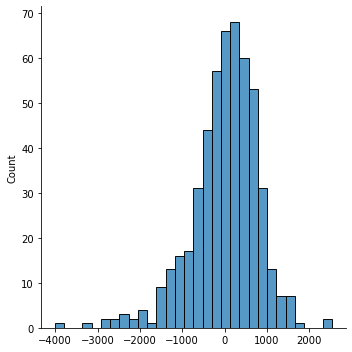

In [236]:
sns.displot(res)

In [237]:
# Rescalling 'temp', 'hum' and 'windspeed' columns for test set

scaler = MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

C:\Users\40104157\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,instant,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weathersit_light_snow,weathersit_mist_cloudy
248,249,0,0,2,1,0.579122,0.934049,0.645149,2710,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
298,299,0,0,3,1,0.506068,0.758667,0.221331,3894,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
159,160,0,0,4,1,0.930216,0.598508,0.224024,3915,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
660,661,1,0,2,1,0.584574,0.675736,0.103938,7466,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
511,512,1,0,0,0,0.775386,0.734094,0.365704,6591,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [238]:
# Model Building

ytest = df_test.pop('cnt')
xtest = df_test

In [239]:
xtest = xtest[cols]

In [240]:
xtest_sm = sm.add_constant(xtest)

C:\Users\40104157\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [243]:
y_test_pred = lr_model.predict(xtest_sm)

In [248]:
print('Train r2: ', r2_score(ytrain, ytrain_pred))

print('Test r2: ', r2_score(ytest, y_test_pred))

Train r2:  0.8265364712634321
Test r2:  0.8494863977842367


In [ ]:
# The train and test rsquared are around the same. Hence, this is a good model.